<table align="left">
<tr>

<th, style="background-color:white">
<img src="https://github.com/mlgill/ODSC_East_2017_PythonNLP/blob/master/assets/logo.png?raw=true", width=140, height=100>
</th>

<th, style="background-color:white">
<div align="left">
<h1>Learning from Text: <br> Introduction to Natural Language Processing with Python</h1>  
<h2>Michelle L. Gill, Ph.D.</h2>     
Senior Data Scientist, Metis  
ODSC East  
May 3, 2017 
</div>
</th>

</tr>
</table>  

## Text Preprocessing Exercise Answers

We will be using SMS spam data for these exercises. The data contains the SMS message text and a label (spam or ham). The following code will load the data for cleaning. The cleaning step will primarily focus on the SMS text rather than the label.

In [1]:
import nltk
from pprint import pprint
from accessory_functions import nltk_path

# Setup nltk corpora path
nltk.data.path.insert(0, nltk_path)
from nltk.corpus import reuters

In [2]:
import pandas as pd

data = pd.read_csv('../data/spam.csv', sep='\t')
data.head()

,label,text
0,ham,Early bird! Any purchases yet?
1,spam,"Hi, this is Mandy Sullivan calling from HOTMIX..."
2,ham,Heart is empty without love.. Mind is empty wi...
3,ham,Yes I started to send requests to make it but ...
4,ham,"I'll see if I can swing by in a bit, got some ..."


If you are not comfortable using Pandas, execute the following code in a cell to separate the y- from the x-columns and create a corpus.

```python
labels = data.label.values.tolist()
data = data.text.values.tolist()
```

## Question 1

* Determine how many SMS messages there are in total.
* Determine the percent of labels for spam vs. ham.
* Determine the distribution of character lengths for the SMS messages.

Number of SMS messages.

In [3]:
len(data)

5572

Percent breakdown of spam vs ham messages.

In [4]:
data.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

Find the distribution of SMS message length two ways--by listing the values and by plotting.

In [5]:
data.text.map(len).value_counts().head(10)

22    120
24     99
32     99
23     95
38     87
28     87
26     85
25     85
27     80
37     79
Name: text, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

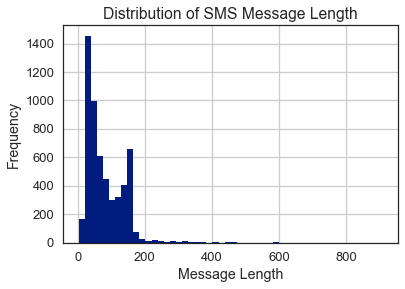

In [7]:
ax = data.text.map(len).hist(bins=50)
ax.set(xlabel='Message Length', ylabel='Frequency', title='Distribution of SMS Message Length');

## Question 2

* Clean the text to normalize it and remove alpha-numerical words.
* Find the most frequent words.
* Determine the word length distribution over the entire corpus.

Before examining the common words and distribution of word lengths, remove the alpha-numerical words and covert the text to lowercase.

In [8]:
data.head()

,label,text
0,ham,Early bird! Any purchases yet?
1,spam,"Hi, this is Mandy Sullivan calling from HOTMIX..."
2,ham,Heart is empty without love.. Mind is empty wi...
3,ham,Yes I started to send requests to make it but ...
4,ham,"I'll see if I can swing by in a bit, got some ..."


In [9]:
import re

lower_alpha_num = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
data['text'] = data.text.map(lower_alpha_num)

data.head()

,label,text
0,ham,early bird! any purchases yet?
1,spam,"hi, this is mandy sullivan calling from hotmix..."
2,ham,heart is empty without love.. mind is empty wi...
3,ham,yes i started to send requests to make it but ...
4,ham,"i'll see if i can swing by in a bit, got some ..."


Then remove any punctuation from each message.

In [10]:
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation  + '£'), ' ', x)
data['text'] = data.text.map(punc_re)

data.head()

,label,text
0,ham,early bird any purchases yet
1,spam,hi this is mandy sullivan calling from hotmix...
2,ham,heart is empty without love mind is empty wi...
3,ham,yes i started to send requests to make it but ...
4,ham,i ll see if i can swing by in a bit got some ...


Split the text into words to tokenize it.

In [11]:
from nltk.tokenize import word_tokenize

data['tokens'] = data.text.map(word_tokenize)
data.head()

,label,text,tokens
0,ham,early bird any purchases yet,"[early, bird, any, purchases, yet]"
1,spam,hi this is mandy sullivan calling from hotmix...,"[hi, this, is, mandy, sullivan, calling, from,..."
2,ham,heart is empty without love mind is empty wi...,"[heart, is, empty, without, love, mind, is, em..."
3,ham,yes i started to send requests to make it but ...,"[yes, i, started, to, send, requests, to, make..."
4,ham,i ll see if i can swing by in a bit got some ...,"[i, ll, see, if, i, can, swing, by, in, a, bit..."


Find the most common words. This could be done with count vectorizer. There is also a way using `Counter` from the `collections` library. First, however, create a flattened list of all words.

In [12]:
word_list = sum(data.tokens.tolist(), [])

word_list[:10]

['early',
 'bird',
 'any',
 'purchases',
 'yet',
 'hi',
 'this',
 'is',
 'mandy',
 'sullivan']

Now convert the list to a dictionary with value counts, reverse the key/value pairs in this dictionary, sort by descending value count, and print the ten most common words.

In [13]:
from collections import Counter

word_counts = Counter(word_list)

# reverse the key/values in the dictionary for sorting
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# sort the list by count
word_counts = sorted(word_counts, reverse=True)

word_counts[:10]

[(3001, 'i'),
 (2253, 'to'),
 (2243, 'you'),
 (1449, 'a'),
 (1339, 'the'),
 (1206, 'u'),
 (980, 'and'),
 (903, 'in'),
 (897, 'is'),
 (818, 'me')]

Optionally, create a histogram of word length.

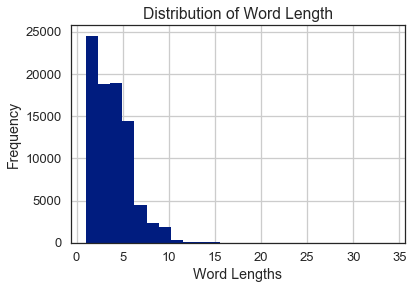

In [14]:
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=25)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

## Question 3

* Remove stopwords
* Perform parts of speech tagging
* Perform stemming and lemmatization
* If you wish, pickle one column of the cleaned text along with the labels for modeling later.

First the stopword removal.

In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop'] = data.tokens.apply(stop_lambda)
data.head()

,label,text,tokens,tokens_stop
0,ham,early bird any purchases yet,"[early, bird, any, purchases, yet]","[early, bird, purchases, yet]"
1,spam,hi this is mandy sullivan calling from hotmix...,"[hi, this, is, mandy, sullivan, calling, from,...","[hi, mandy, sullivan, calling, hotmix, fm, cho..."
2,ham,heart is empty without love mind is empty wi...,"[heart, is, empty, without, love, mind, is, em...","[heart, empty, without, love, mind, empty, wit..."
3,ham,yes i started to send requests to make it but ...,"[yes, i, started, to, send, requests, to, make...","[yes, started, send, requests, make, pain, cam..."
4,ham,i ll see if i can swing by in a bit got some ...,"[i, ll, see, if, i, can, swing, by, in, a, bit...","[see, swing, bit, got, things, take, care, firsg]"


Now the parts of speech tagging. Convert the POS tag to the format expected by lemmatization to make that step easier.

In [16]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    # Convert the naming scheme to that recognized by WordNet
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos'] = (data.tokens_stop
                      .apply(pos_lambda)
                      .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x]))
data.head()

,label,text,tokens,tokens_stop,tokens_pos
0,ham,early bird any purchases yet,"[early, bird, any, purchases, yet]","[early, bird, purchases, yet]","[(early, r), (bird, n), (purchases, n), (yet, r)]"
1,spam,hi this is mandy sullivan calling from hotmix...,"[hi, this, is, mandy, sullivan, calling, from,...","[hi, mandy, sullivan, calling, hotmix, fm, cho...","[(hi, n), (mandy, a), (sullivan, n), (calling,..."
2,ham,heart is empty without love mind is empty wi...,"[heart, is, empty, without, love, mind, is, em...","[heart, empty, without, love, mind, empty, wit...","[(heart, n), (empty, v), (without, n), (love, ..."
3,ham,yes i started to send requests to make it but ...,"[yes, i, started, to, send, requests, to, make...","[yes, started, send, requests, make, pain, cam...","[(yes, r), (started, v), (send, n), (requests,..."
4,ham,i ll see if i can swing by in a bit got some ...,"[i, ll, see, if, i, can, swing, by, in, a, bit...","[see, swing, bit, got, things, take, care, firsg]","[(see, v), (swing, a), (bit, n), (got, v), (th..."


Next the stemming. It can be interesting to compare the differences between stemming and lemmatization, so let's create a separate column for each.

In [17]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

data['tokens_stem'] = data.tokens_stop.apply(stem_lambda)
data.head()

,label,text,tokens,tokens_stop,tokens_pos,tokens_stem
0,ham,early bird any purchases yet,"[early, bird, any, purchases, yet]","[early, bird, purchases, yet]","[(early, r), (bird, n), (purchases, n), (yet, r)]","[earli, bird, purchas, yet]"
1,spam,hi this is mandy sullivan calling from hotmix...,"[hi, this, is, mandy, sullivan, calling, from,...","[hi, mandy, sullivan, calling, hotmix, fm, cho...","[(hi, n), (mandy, a), (sullivan, n), (calling,...","[hi, mandi, sullivan, call, hotmix, fm, chosen..."
2,ham,heart is empty without love mind is empty wi...,"[heart, is, empty, without, love, mind, is, em...","[heart, empty, without, love, mind, empty, wit...","[(heart, n), (empty, v), (without, n), (love, ...","[heart, empti, without, love, mind, empti, wit..."
3,ham,yes i started to send requests to make it but ...,"[yes, i, started, to, send, requests, to, make...","[yes, started, send, requests, make, pain, cam...","[(yes, r), (started, v), (send, n), (requests,...","[yes, start, send, request, make, pain, came, ..."
4,ham,i ll see if i can swing by in a bit got some ...,"[i, ll, see, if, i, can, swing, by, in, a, bit...","[see, swing, bit, got, things, take, care, firsg]","[(see, v), (swing, a), (bit, n), (got, v), (th...","[see, swing, bit, got, thing, take, care, firsg]"


Now the lemmatization. We will use the column with the parts-of-speech tagging.

In [18]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma'] = data.tokens_pos.apply(lambda x: [lemmatizer_fun(y) for y in x])

# View the columns transposed
data.head().T

,0,1,2,3,4
label,ham,spam,ham,ham,ham
text,early bird any purchases yet,hi this is mandy sullivan calling from hotmix...,heart is empty without love mind is empty wi...,yes i started to send requests to make it but ...,i ll see if i can swing by in a bit got some ...
tokens,"[early, bird, any, purchases, yet]","[hi, this, is, mandy, sullivan, calling, from,...","[heart, is, empty, without, love, mind, is, em...","[yes, i, started, to, send, requests, to, make...","[i, ll, see, if, i, can, swing, by, in, a, bit..."
tokens_stop,"[early, bird, purchases, yet]","[hi, mandy, sullivan, calling, hotmix, fm, cho...","[heart, empty, without, love, mind, empty, wit...","[yes, started, send, requests, make, pain, cam...","[see, swing, bit, got, things, take, care, firsg]"
tokens_pos,"[(early, r), (bird, n), (purchases, n), (yet, r)]","[(hi, n), (mandy, a), (sullivan, n), (calling,...","[(heart, n), (empty, v), (without, n), (love, ...","[(yes, r), (started, v), (send, n), (requests,...","[(see, v), (swing, a), (bit, n), (got, v), (th..."
tokens_stem,"[earli, bird, purchas, yet]","[hi, mandi, sullivan, call, hotmix, fm, chosen...","[heart, empti, without, love, mind, empti, wit...","[yes, start, send, request, make, pain, came, ...","[see, swing, bit, got, thing, take, care, firsg]"
tokens_lemma,"[early, bird, purchase, yet]","[hi, mandy, sullivan, call, hotmix, fm, choose...","[heart, empty, without, love, mind, empty, wit...","[yes, start, send, request, make, pain, come, ...","[see, swing, bit, get, thing, take, care, firsg]"


Compare the results of stemming to the text that was not stemmed.

In [19]:
stem_lem_comp = lambda x: [y for y in zip(x.tokens_stem, x.tokens_lemma) if y[0] != y[1]]
stem_lem_results = data.apply(stem_lem_comp, axis=1)

# Print the first five rows
print(stem_lem_results.iloc[:5].values)

[[('earli', 'early'), ('purchas', 'purchase')]
 [('mandi', 'mandy'), ('chosen', 'choose'), ('receiv', 'receive'), ('pleas', 'please'), ('telephon', 'telephone'), ('someon', 'someone'), ('els', 'else')]
 [('empti', 'empty'), ('empti', 'empty'), ('empti', 'empty'), ('empti', 'empty'), ('alwi', 'alwys')]
 [('came', 'come'), ('doubl', 'double'), ('factori', 'factory'), ('got', 'get'), ('nitro', 'nitros')]
 [('got', 'get')]]


When parts-of-speech tagging is used with lemmatization, it consistently returns better results than stemming. However, stemming is usually faster.

Let's pickle the lemmatized data for use in the next set of exercises, if desired.

In [20]:
pd.options.mode.chained_assignment = None

# Extract the columns we want and join the tokens
data_out = data[['label', 'tokens_lemma']]
data_out['text'] = data_out.tokens_lemma.apply(' '.join)

# Drop the tokenized column
data_out = data_out.drop(['tokens_lemma'], axis=1)

# Write out the pickle file
data_out.to_pickle('../data/spam_preprocessed.pkl')

An alternative to performing all of this tedious cleaning over and over again is to create a convenience function. The file [`accessory_functions.py`](./accessory_functions.py) contains two functions. The first will perform the parts-of-speech conversion to the names used by the WordNet lemmatizer. The second will perform all steps of the preprocessing pathway on a Pandas series.

## Question 4

* Create a document-term matrix using count vectorizer. Examine the feature names to determine if any additional cleaning needs to be performed.
* Create additional count vectorizer matrices with different n-gram and binary (T/F) values.

We will used the lemmatized data for the count vectorizer model.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

data['lemma_input'] = data.tokens_lemma.map(' '.join)
cv1 = CountVectorizer()
X = cv1.fit_transform(data.lemma_input)

In [22]:
print(X.shape, len(cv1.get_feature_names()))

(5572, 6528) 6528


In [23]:
print(X.min(), X.max())

0 18


View the document-term matrix.

In [24]:
pd.DataFrame(X.toarray(),
             columns = cv1.get_feature_names()).head()

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The second count vectorizer model.

In [25]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True)
X = cv2.fit_transform(data.lemma_input)

In [26]:
print(X.shape, len(cv2.get_feature_names()))

(5572, 35310) 35310


In [27]:
print(X.min(), X.max())

0 1


View the document-term matrix.

In [28]:
pd.DataFrame(X.toarray(),
             columns = cv2.get_feature_names()).head()

,aa,aa exhaust,aah,aah bless,aah cuddle,aah speak,aaniye,aaniye pudunga,aaooooright,aaooooright work,...,zogtorius ve,zoom,zoom cine,zouk,zouk nichols,zyada,zyada kisi,èn,〨ud,〨ud evening
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


N-grams cause the number of features to expand rapidly!